In [59]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_style("darkgrid")
from sklearn import linear_model
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import random

import warnings
warnings.filterwarnings('ignore')

def far_to_cel(temp):
    return 5*(temp)/9 - 5*32/9

In [60]:
# Levanto los datos, y los veo

df = pd.read_csv('../data/temperaturas_catedra/GlobalLandTemperaturesByCountry.csv')
df_lat_long = pd.read_csv('../data/polos/sea_level/La_Corunia.csv')

df_south_pole = pd.read_csv('../data/polos/temperaturas/south_pole.csv')
df_ushuaia = pd.read_csv('../data/polos/sea_level/Ushuaia.csv')

df_sl_global = pd.read_csv('../data/polos/sea_level/global.csv')

"""""
print("Decripción de los datos")
print(df_south_pole.describe())

print("\nLas primeras 8 filas de los datos de la temperatura del polo sur")
print(df_south_pole.head(8))

print("\n")

print("\nDecripción de los datos Ushuaia")
print(df_ushuaia.describe())

print("\nLas primeras 8 filas de los datos de altura de Ushuaia")
print(df_ushuaia.head(8))
"""""
print("Decripción de los datos")
print(df_sl_global.describe())

print("\nLas primeras 8 filas de los datos")
print(df_sl_global.head(8))

Decripción de los datos
              Year  CSIRO Adjusted Sea Level  Lower Error Bound  \
count   135.000000                134.000000         134.000000   
mean   1947.000000                  3.650341           3.204666   
std      39.115214                  2.485692           2.663781   
min    1880.000000                 -0.440945          -1.346457   
25%    1913.500000                  1.632874           1.078740   
50%    1947.000000                  3.312992           2.915354   
75%    1980.500000                  5.587598           5.329724   
max    2014.000000                  9.326772           8.992126   

       Upper Error Bound  NOAA Adjusted Sea Level  
count         134.000000                22.000000  
mean            4.096016                 7.422835  
std             2.312581                 0.729114  
min             0.464567                 6.297493  
25%             2.240157                 6.852969  
50%             3.710630                 7.498143  
75%     

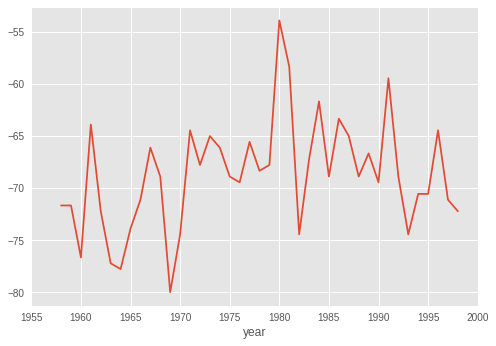

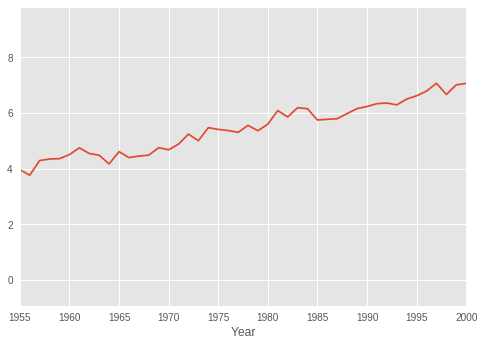

In [61]:
# Gráficos los datos

#convirtiendo todo a celsius
for i in range(0,41):
    df_south_pole.ix[i, 'temp'] = far_to_cel(df_south_pole.ix[i, 'temp'])
    #print(df_south_pole.ix[i, 'temp'])

ax = sns.tsplot(data=df_south_pole['temp'], time=df_south_pole['year'], interpolate=True)
sns.plt.xlim((1955,2000))
sns.plt.show()
sns.plt.close()


ax = sns.tsplot(data=df_sl_global['CSIRO Adjusted Sea Level'], time=df_sl_global['Year'], interpolate=True)
sns.plt.xlim((1955,2000))
sns.plt.show()
sns.plt.close()

In [73]:
# Limpio los outliers
"""""
def mascara_outliers(s):
    return abs(s - s.mean()) <= 2*s.std()
    
mascara = mascara_outliers(grouped['AverageTemperature'])
grouped = grouped[mascara]
sns.tsplot(data=grouped['AverageTemperature'], interpolate=True)
sns.plt.show()
"""""

'""\ndef mascara_outliers(s):\n    return abs(s - s.mean()) <= 2*s.std()\n    \nmascara = mascara_outliers(grouped[\'AverageTemperature\'])\ngrouped = grouped[mascara]\nsns.tsplot(data=grouped[\'AverageTemperature\'], interpolate=True)\nsns.plt.show()\n'

# Ahora si, lo importante del TP

Error de predicción: 1.04


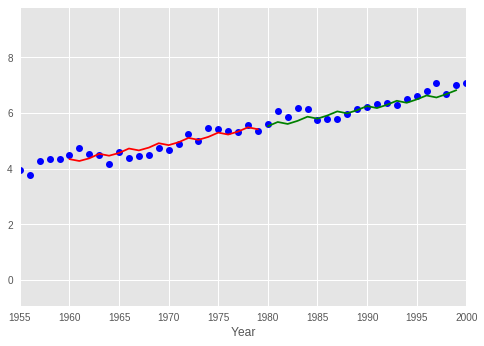

In [78]:
# Uso cuadrados mínimos para predecir


def armar_matriz_A(s):
    temp = []
    for t in s:
        #temp.append([t^4, t^3, t^2, t, 1, np.sin(t)])
        temp.append([t, 1, np.cos((2.1)*t+6)])
    return np.array(temp)

def entrenar_y_predecir_en_rangos(df, rango_entrenamiento, rango_prediccion, tag1, tag2):
    regr = linear_model.LinearRegression(fit_intercept=False)

    # Entreno el modelo
    df_e = df[df[tag1].isin(rango_entrenamiento)]
    A_e = armar_matriz_A(df_e[tag1])
    regr.fit(A_e, df_e[tag2])

    # Me fijo la aproximación que se realizó
    df_e['p'] = regr.predict(A_e)
    sns.tsplot(time=df_e[tag1], data=df_e['p'], color='r')

    # Realizo predicciones
    df_p = df[df[tag1].isin(rango_prediccion)]

    A_p = armar_matriz_A(df_p[tag1])
    df_p['p'] = regr.predict(A_p)
    sns.tsplot(time=df_p[tag1], data=df_p['p'], color='g')

    ECM = sum((df_p['p']-df_p[tag2])**2)
    return ECM

def predecir(datos, k, rango,limitador, tag1, tag2):
    return entrenar_y_predecir_en_rangos(datos, range(k-rango,k), range(k,k+rango-limitador), tag1, tag2)


def graficador(datos, año, rango, limitador, x0, x1):
    ECM = predecir(datos,año,rango,limitador,'Year', 'CSIRO Adjusted Sea Level')
    print("Error de predicción: {:.2f}".format(ECM))
        
    sns.plt.xlim((x0,x1))
    sns.plt.show()
    sns.plt.close()


sns.tsplot(data=df_sl_global['CSIRO Adjusted Sea Level'], time=df_sl_global['Year'], interpolate=False, color='b')
graficador(df_sl_global, 1980, 20, 0, 1955, 2000)
